In [79]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

ds = datasets.load_digits()
X = ds.data
y = ds.target


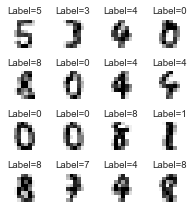

In [135]:
# Part a
si = np.random.permutation(X.shape[0])
X = X[si]
y = y[si]
X_sample = X[:16]
y_sample = y[:16]

fig, axes = plt.subplots(4, 4, figsize=(3, 3))
for xi, yi, ax in zip(X_sample, y_sample, axes.flatten()):
    image = xi.reshape(8, 8)
    ax.imshow(image, cmap=matplotlib.cm.binary)
    ax.set_title(f"Label={yi}")
    ax.axis('off')
fig.savefig('P4_a.png')
plt.show()

In [51]:
# Part b
def euclidean_distance(u, v):
    return np.sqrt(np.sum(np.square(u - v)))


def cosine_distance(u, v):
    u_norm = np.sum(np.square(u))
    v_norm = np.sum(np.square(v))
    sim = np.dot(u, v) / (u_norm * v_norm)
    return 1 - sim


def KNN(X_train, y_train, X_test, k=3, dist=euclidean_distance):
    y_pred = np.zeros(X_test.shape[0], dtype=int)
    neighbors = np.zeros((X_test.shape[0], k), dtype=int)
    for i in range(X_test.shape[0]):
        d = np.zeros(X_train.shape[0])
        for j in range(X_train.shape[0]):
            d[j] = dist(X_test[i], X_train[j])
        neighbors[i] = np.argsort(d)[:k]
        y_pred[i] = np.bincount(y_train[neighbors[i]]).argmax()
    return y_pred, neighbors


In [56]:
# Part c
def split_data(X, y, test_size):
    tslen = int(test_size * len(y))
    X_test = X[:tslen]
    X_train = X[tslen:]
    y_test = y[:tslen]
    y_train = y[tslen:]
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data(X, y, 0.2)
K = list(range(1, 41))

er_eu = []
er_co = []
for k in K:
    y_pred_eu, _ = KNN(X_train, y_train, X_test, k, euclidean_distance)
    y_pred_co, _ = KNN(X_train, y_train, X_test, k, cosine_distance)
    er_eu.append(np.mean(y_pred_eu != y_test))
    er_co.append(np.mean(y_pred_co != y_test))

Best k for Euclidean distance: 4
Best k for Cosine distance: 9


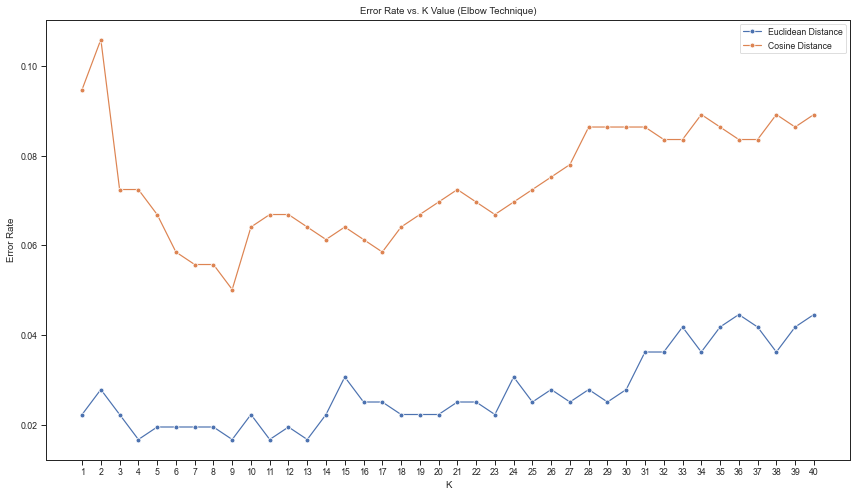

In [59]:
optk_eu = np.argmin(er_eu) + 1
optk_co = np.argmin(er_co) + 1

print('Best k for Euclidean distance:', optk_eu)
print('Best k for Cosine distance:', optk_co)

fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x=K, y=er_eu, marker='o', label='Euclidean Distance', ax=ax)
sns.lineplot(x=K, y=er_co, marker='o', label='Cosine Distance', ax=ax)
ax.set(
    title='Error Rate vs. K Value (Elbow Technique)',
    xlabel='K',
    ylabel='Error Rate',
    xticks=K,
)
fig.savefig('P4_c.png')
plt.show()

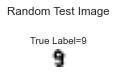

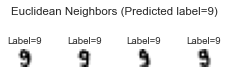

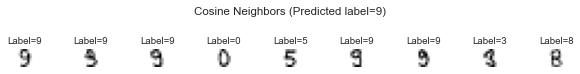

In [134]:
# Part e
ri = np.random.randint(0, X_test.shape[0] + 1)
y_pred_eu, nei_eu = KNN(X_train, y_train, X_test[ri:ri+1], optk_eu, euclidean_distance)
y_pred_co, nei_co = KNN(X_train, y_train, X_test[ri:ri+1], optk_co, cosine_distance)

fig, ax = plt.subplots(figsize=(2, 1))
image = X_test[ri].reshape(8, 8)
ax.imshow(image, cmap=matplotlib.cm.binary)
ax.set_title(f"True Label={y_test[ri]}")
ax.axis('off')
fig.suptitle('Random Test Image')
fig.savefig('P4_e_1.png')
plt.show()

fig, axes = plt.subplots(1, optk_eu, figsize=(optk_eu, 1))
for ni, ax in zip(nei_eu[0], axes.flatten()):
    image = X_train[ni].reshape(8, 8)
    ax.imshow(image, cmap=matplotlib.cm.binary)
    ax.set_title(f"Label={y_train[ni]}")
    ax.axis('off')
fig.suptitle(f'Euclidean Neighbors (Predicted label={y_pred_eu[0]})')
fig.savefig('P4_e_2.png')
plt.show()

fig, axes = plt.subplots(1, optk_co, figsize=(optk_co, 1))
for ni, ax in zip(nei_co[0], axes.flatten()):
    image = X_train[ni].reshape(8, 8)
    ax.imshow(image, cmap=matplotlib.cm.binary)
    ax.set_title(f"Label={y_train[ni]}")
    ax.axis('off')
fig.suptitle(f'Cosine Neighbors (Predicted label={y_pred_co[0]})')
fig.savefig('P4_e_3.png')
plt.show()

In [158]:
# Part f
def confusion_matrix(y_true, y_pred, labels):
    """Confusion Matrix for Multi-Class Classification"""
    m = np.zeros((len(labels), len(labels)), dtype=int)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            m[i, j] = np.sum((y_true == labels[i]) & (y_pred == labels[j]))
    return m


y_pred_eu, _ = KNN(X_train, y_train, X_test, optk_eu, euclidean_distance)
y_pred_co, _ = KNN(X_train, y_train, X_test, optk_co, cosine_distance)

labels = np.sort(np.unique(y_test))
cm_eu = confusion_matrix(y_test, y_pred_eu, labels)
cm_co = confusion_matrix(y_test, y_pred_co, labels)

print('Confusion Matrix for Euclidean Distance:')
print(cm_eu, '\n\n')

print('Confusion Matrix for Cosine Distance:')
print(cm_co)


Confusion Matrix for Euclidean Distance:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  2  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  2 33]] 


Confusion Matrix for Cosine Distance:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 1  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  1  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 1  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 1  1  0  5  0  0  0  0 24  1]
 [ 1  0  0  0  0  2  0  1  1 31]]


In [169]:
# Part g
def performance_results(cm, labels, target_label):
    i = list(labels).index(target_label)
    TP = cm[i, i]
    FN = cm[i, :i].sum() + cm[i, i+1:].sum()
    FP = cm[:i, i].sum() + cm[i+1:, i].sum()

    cm_ = cm.copy()
    cm_[i, i] = 0
    TN = cm_.flatten().sum()

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    precision = TP / (TP + FP)
    F1 = 2 * precision * TPR / (precision + TPR)

    print('TP:', TP)
    print('TN:', TN)
    print('FP:', FP)
    print('FN:', FN)
    print('F1-score:', round(F1, 4))
    print('Precision:', round(precision, 4))
    print('TPR (Recall, Sensitivity):', round(TPR, 4))
    print('TNR (Specificity):', round(TNR, 4))


print(f'Euclidean Distance Performance for target 8:')
performance_results(cm_eu, labels, 8)
print()

print(f'Euclidean Distance Performance for target 3:')
performance_results(cm_eu, labels, 3)

Euclidean Distance Performance for target 8:
TP: 30
TN: 329
FP: 2
FN: 2
F1-score: 0.9375
Precision: 0.9375
TPR (Recall, Sensitivity): 0.9375
TNR (Specificity): 0.994

Euclidean Distance Performance for target 3:
TP: 37
TN: 322
FP: 0
FN: 0
F1-score: 1.0
Precision: 1.0
TPR (Recall, Sensitivity): 1.0
TNR (Specificity): 1.0


In [170]:
# Part h
print(f'Cosine Distance Performance for target 6:')
performance_results(cm_co, labels, 6)
print()

print(f'Cosine Distance Performance for target 4:')
performance_results(cm_co, labels, 4)

Cosine Distance Performance for target 6:
TP: 42
TN: 317
FP: 0
FN: 1
F1-score: 0.9882
Precision: 1.0
TPR (Recall, Sensitivity): 0.9767
TNR (Specificity): 1.0

Cosine Distance Performance for target 4:
TP: 34
TN: 325
FP: 0
FN: 1
F1-score: 0.9855
Precision: 1.0
TPR (Recall, Sensitivity): 0.9714
TNR (Specificity): 1.0
